In [3]:
import sys
sys.path.insert(0, "/home/pwahle/proliferating_RGC/")

import yaml
import modules
import utils
import numpy as np
from bs4 import BeautifulSoup

# load global variables and parameters
with open("../params.yml", 'r') as ymlfile:
    cfg = yaml.load(ymlfile, Loader=yaml.FullLoader)

globals().update(cfg)

path = data_path + 'July_2023_optimization/20_vs_4_degree/cycle1/'

outname = 'multipoints_C1_updated.xml'
origina_file = 'multipoints.xml'
new_file = 'multipoints_C1.xml'
npositions = 5

with open(path + origina_file, 'rb') as f:
    data = f.read()
Bs_orig = BeautifulSoup(data, "xml")

with open(path + new_file, 'rb') as f:
    data = f.read()
Bs_new = BeautifulSoup(data, "xml")

In [4]:
a1 = [float(Bs_orig.find_all('dXPosition', {'runtype':'double'})[i]['value']) for i in np.arange(npositions)]
a2 = [float(Bs_orig.find_all('dYPosition', {'runtype':'double'})[i]['value']) for i in np.arange(npositions)]
a3 = [float(Bs_orig.find_all('dZPosition', {'runtype':'double'})[i]['value']) for i in np.arange(npositions)]
v0 = np.array([a1,a2,a3])

b1 = [float(Bs_new.find_all('dXPosition', {'runtype':'double'})[i]['value']) for i in np.arange(npositions)]
b2 = [float(Bs_new.find_all('dYPosition', {'runtype':'double'})[i]['value']) for i in np.arange(npositions)]
b3 = [float(Bs_new.find_all('dZPosition', {'runtype':'double'})[i]['value']) for i in np.arange(npositions)]
v1 = np.array([b1,b2,b3])

T = utils.affine_matrix_from_points(v0, v1,shear=False, scale=False, usesvd=True)

bX = [float(i['value']) for i in Bs_orig.find_all('dXPosition', {'runtype':'double'})[npositions:]] 
bY = [float(i['value']) for i in Bs_orig.find_all('dYPosition', {'runtype':'double'})[npositions:]] 
bZ = [float(i['value']) for i in Bs_orig.find_all('dZPosition', {'runtype':'double'})[npositions:]] 
v3 = np.stack([bX,bY,bZ,np.ones(len(bZ))])

projected_points = np.matmul(T,v3)

for tag in np.arange(len(Bs_orig.find_all('dXPosition', {'runtype':'double'})))[npositions:]:
    Bs_orig.find_all('dXPosition', {'runtype':'double'})[tag]['value'] = str(projected_points[0,tag-npositions])
    
for tag in np.arange(len(Bs_orig.find_all('dXPosition', {'runtype':'double'})))[:npositions]:
    Bs_orig.find_all('dXPosition', {'runtype':'double'})[tag]['value'] = str(v1[0,tag])
    
for tag in np.arange(len(Bs_orig.find_all('dYPosition', {'runtype':'double'})))[npositions:]:
    Bs_orig.find_all('dYPosition', {'runtype':'double'})[tag]['value'] = str(projected_points[1,tag-npositions])
    
for tag in np.arange(len(Bs_orig.find_all('dYPosition', {'runtype':'double'})))[:npositions]:
    Bs_orig.find_all('dYPosition', {'runtype':'double'})[tag]['value'] = str(v1[1,tag])
    
for tag in np.arange(len(Bs_orig.find_all('dZPosition', {'runtype':'double'})))[npositions:]:
    Bs_orig.find_all('dZPosition', {'runtype':'double'})[tag]['value'] = str(projected_points[2,tag-npositions])
    
for tag in np.arange(len(Bs_orig.find_all('dZPosition', {'runtype':'double'})))[:npositions]:
    Bs_orig.find_all('dZPosition', {'runtype':'double'})[tag]['value'] = str(v1[2,tag])
    
with open(path + outname, "w") as f:
    f.write(Bs_orig.prettify())
    
print('updated points in file ' + outname)

updated points in file multipoints_C1_updated.xml


In [47]:
#a1 = np.array([float(Bs_orig.find_all('dXPosition', {'runtype':'double'})[0]['value']),float(Bs_orig.find_all('dXPosition', {'runtype':'double'})[1]['value']),float(Bs_orig.find_all('dXPosition', {'runtype':'double'})[2]['value']),float(Bs_orig.find_all('dXPosition', {'runtype':'double'})[3]['value']),float(Bs_orig.find_all('dXPosition', {'runtype':'double'})[4]['value'])])
#a2 = np.array([float(Bs_orig.find_all('dYPosition', {'runtype':'double'})[0]['value']),float(Bs_orig.find_all('dYPosition', {'runtype':'double'})[1]['value']),float(Bs_orig.find_all('dYPosition', {'runtype':'double'})[2]['value']),float(Bs_orig.find_all('dYPosition', {'runtype':'double'})[3]['value']),float(Bs_orig.find_all('dYPosition', {'runtype':'double'})[4]['value'])])
#a3 = np.array([float(Bs_orig.find_all('dZPosition', {'runtype':'double'})[0]['value']),float(Bs_orig.find_all('dZPosition', {'runtype':'double'})[1]['value']),float(Bs_orig.find_all('dZPosition', {'runtype':'double'})[2]['value']),float(Bs_orig.find_all('dZPosition', {'runtype':'double'})[3]['value']),float(Bs_orig.find_all('dZPosition', {'runtype':'double'})[4]['value'])])
##v0 = np.array([a1,a2,a3,[0,0,0,1]])
#v0 = np.array([a1,a2,a3])

#b1 = np.array([float(Bs_new.find_all('dXPosition', {'runtype':'double'})[0]['value']),float(Bs_new.find_all('dXPosition', {'runtype':'double'})[1]['value']),float(Bs_new.find_all('dXPosition', {'runtype':'double'})[2]['value']),float(Bs_new.find_all('dXPosition', {'runtype':'double'})[3]['value']),float(Bs_new.find_all('dXPosition', {'runtype':'double'})[4]['value'])])
#b2 = np.array([float(Bs_new.find_all('dYPosition', {'runtype':'double'})[0]['value']),float(Bs_new.find_all('dYPosition', {'runtype':'double'})[1]['value']),float(Bs_new.find_all('dYPosition', {'runtype':'double'})[2]['value']),float(Bs_new.find_all('dYPosition', {'runtype':'double'})[3]['value']),float(Bs_new.find_all('dYPosition', {'runtype':'double'})[4]['value'])])
#b3 = np.array([float(Bs_new.find_all('dZPosition', {'runtype':'double'})[0]['value']),float(Bs_new.find_all('dZPosition', {'runtype':'double'})[1]['value']),float(Bs_new.find_all('dZPosition', {'runtype':'double'})[2]['value']),float(Bs_new.find_all('dZPosition', {'runtype':'double'})[3]['value']),float(Bs_new.find_all('dZPosition', {'runtype':'double'})[4]['value'])])
#v1 = np.array([b1,b2,b3,[0,0,0,1]])
#v1 = np.array([b1,b2,b3])

T = utils.affine_matrix_from_points(v0, v1,shear=False, scale=False, usesvd=True)

#bX = []
#for i in Bs_orig.find_all('dXPosition', {'runtype':'double'})[5:]:
#    bX.append(float(i['value']))
##bX.append(float(0))
#bY = []
#for i in Bs_orig.find_all('dYPosition', {'runtype':'double'})[5:]:
#    bY.append(float(i['value']))
##bY.append(float(0))
#bZ = []
#for i in Bs_orig.find_all('dZPosition', {'runtype':'double'})[5:]:
#    bZ.append(float(i['value']))
##bZ.append(float(0))
    
#v3 = np.squeeze(np.dstack([bX,bY,bZ,np.ones(len(bZ))]))
v3 = np.stack([bX,bY,bZ,np.ones(len(bZ))])

#v3[v3.shape[0]-1,v3.shape[1]-1] = 1
#v3 = np.stack([bX,bY,bZ])

projected_points = np.matmul(T,v3)

In [48]:
for tag in np.arange(len(Bs_orig.find_all('dXPosition', {'runtype':'double'})))[5:]:
    Bs_orig.find_all('dXPosition', {'runtype':'double'})[tag]['value'] = str(projected_points[0,tag-5])
    
for tag in np.arange(len(Bs_orig.find_all('dXPosition', {'runtype':'double'})))[:5]:
    Bs_orig.find_all('dXPosition', {'runtype':'double'})[tag]['value'] = str(v1[0,tag])
    
for tag in np.arange(len(Bs_orig.find_all('dYPosition', {'runtype':'double'})))[5:]:
    Bs_orig.find_all('dYPosition', {'runtype':'double'})[tag]['value'] = str(projected_points[1,tag-5])
    
for tag in np.arange(len(Bs_orig.find_all('dYPosition', {'runtype':'double'})))[:5]:
    Bs_orig.find_all('dYPosition', {'runtype':'double'})[tag]['value'] = str(v1[1,tag])
    
for tag in np.arange(len(Bs_orig.find_all('dZPosition', {'runtype':'double'})))[5:]:
    Bs_orig.find_all('dZPosition', {'runtype':'double'})[tag]['value'] = str(projected_points[2,tag-5])
    
for tag in np.arange(len(Bs_orig.find_all('dZPosition', {'runtype':'double'})))[:5]:
    Bs_orig.find_all('dZPosition', {'runtype':'double'})[tag]['value'] = str(v1[2,tag])
    
    
with open(path + outname, "w") as f:
    f.write(Bs_orig.prettify())
    
print('updated points in file ' + outname)

updated points in file multipoints_C1_updated.xml


In [81]:
a1 = np.array([float(Bs_orig.find_all('dXPosition', {'runtype':'double'})[0]['value']),float(Bs_orig.find_all('dXPosition', {'runtype':'double'})[1]['value']),float(Bs_orig.find_all('dXPosition', {'runtype':'double'})[2]['value']),float(Bs_orig.find_all('dXPosition', {'runtype':'double'})[4]['value'])])
a2 = np.array([float(Bs_orig.find_all('dYPosition', {'runtype':'double'})[0]['value']),float(Bs_orig.find_all('dYPosition', {'runtype':'double'})[1]['value']),float(Bs_orig.find_all('dYPosition', {'runtype':'double'})[2]['value']),float(Bs_orig.find_all('dYPosition', {'runtype':'double'})[4]['value'])])
a3 = np.array([float(Bs_orig.find_all('dZPosition', {'runtype':'double'})[0]['value']),float(Bs_orig.find_all('dZPosition', {'runtype':'double'})[1]['value']),float(Bs_orig.find_all('dZPosition', {'runtype':'double'})[2]['value']),float(Bs_orig.find_all('dZPosition', {'runtype':'double'})[4]['value'])])
v4 = np.array([a1,a2,a3])

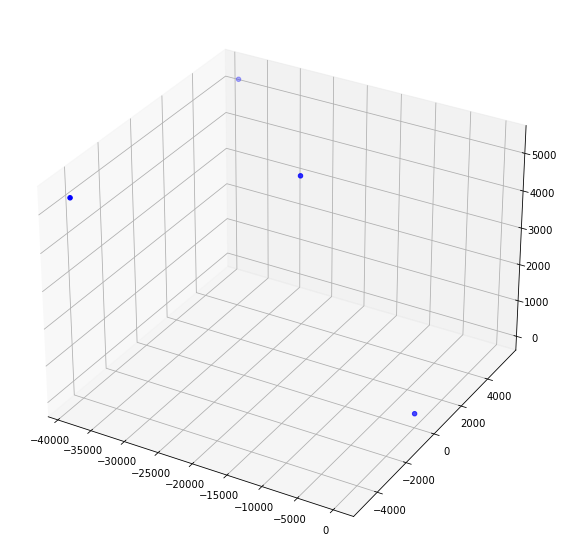

In [132]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')
xs = v0[0]
ys = v0[1]
zs = v0[2]
x2 = v1[0]
y2 = v1[1]
z2 = v1[2]
ax.scatter(xs, ys, zs, marker='o', color = 'blue')
#ax.scatter(x2, y2, z2, marker='o', color = 'red')
plt.show()

In [203]:

v0 = np.array([[1,2,0],
               [2,4,0]])
v1 = np.array([[2,3,1],
               [3,5,1]])

T = utils.affine_matrix_from_points(v0, v1,shear=False, scale=False, usesvd=True)

In [206]:
v3 = np.array([[1,1,0],
               [2,2,0]])

np.matmul(v3,T)

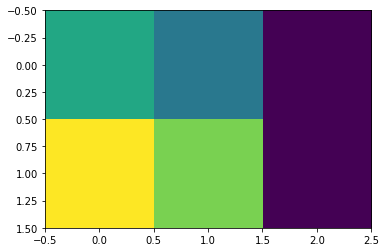

In [112]:
plt.imshow(v1)

In [157]:
B = np.arange(0,11,2)

In [159]:
B.reshape(2,3)


array([[ 0,  2,  4],
       [ 6,  8, 10]])

In [162]:
D = np.array([[3,4,2,8],[1,5,4,7]])

In [169]:
A1 = np.arange(1,10).reshape(3,3)
A2 = np.arange(5,14).reshape(3,3)

In [171]:
A3 = A1*A2

In [173]:
A4 = A1.dot(A2)
A4

array([[ 54,  60,  66],
       [126, 141, 156],
       [198, 222, 246]])

In [176]:
np.matmul(A1,A2)

array([[ 54,  60,  66],
       [126, 141, 156],
       [198, 222, 246]])

In [177]:
A1@A2

array([[ 54,  60,  66],
       [126, 141, 156],
       [198, 222, 246]])

In [158]:


#v1 =  np.array([[2],
#               [2],
#               [2],
#               [1]])

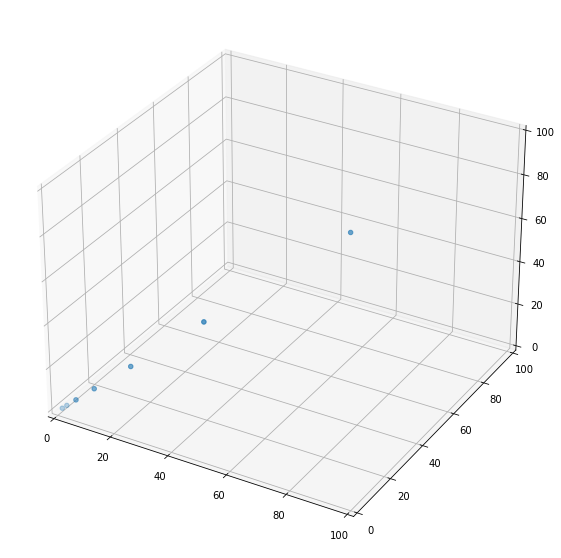

In [257]:
import matplotlib.pyplot as plt
import numpy as np

T = np.array([[1,0,0,3],
              [0,1,0,3],
              [0,0,1,3],
              [0,0,0,1]])

v0 = np.array([[1,2,4,8,16,32],
               [1,2,4,8,16,32],
               [1,2,4,8,16,32],
               [1,2,4,8,16,32]])

v1 = T @ v0

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')
xs = [v0[0],v1[0]]
ys = [v0[1],v1[1]]
zs = [v0[2],v1[2]]
ax.scatter(xs, ys, zs, marker='o')
ax.axes.set_xlim3d(left=0, right=100) 
ax.axes.set_ylim3d(bottom=0, top=100) 
ax.axes.set_zlim3d(bottom=0, top=100) 
plt.show()
